In [140]:
import numpy as np
from AV_Aimsun_parameters import *
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from numpy import histogram
import seaborn as sns
import scipy.stats as stats

In [141]:
data_dir = "..\Aimsun\TwoLaneOneWay\AV-penetration\Auto_av"

In [142]:
assertive_file_names = []
for file in os.listdir(os.path.join(data_dir, "Assertive")):
    file_name = os.path.splitext(file)[0]
    assertive_file_names.append(file_name)

cautious_file_names = []
for file in os.listdir(os.path.join(data_dir, "Cautious")):
    file_name = os.path.splitext(file)[0]
    cautious_file_names.append(file_name)

In [144]:
# get the file order correct (0 to 100% penetration rate)
cautious_temp = cautious_file_names.pop(1)
cautious_file_names.append(cautious_temp)

assertive_temp = assertive_file_names.pop(1)
assertive_file_names.append(assertive_temp)

In [145]:
class AV_analysis(AimsunData):
    """ 
    Initialise a connection to the AV analysis SQLITE files.
    """
    def __init__(self, filename1, folder_name):
        super().__init__(filename1, folder_name)
        
        try:
            self.c1
        except AttributeError:
            self.getconnection(filename1, folder_name)
    
    def AV_params(self):
        Aimsun_dict = self.Aggregated_Aimsun_values(self.c1)          # Has to be made available when changed in Aimsun_parameters.py
        return Aimsun_dict


In [146]:
print("Processing assertive data...")
Assertive_data_dict = {}

for filename in assertive_file_names:
    DB_data = AV_analysis(filename + ".sqlite", folder_name = "AV-penetration\Auto_av\Assertive")
    print("count 1")
    Assertive_data_dict[filename] = DB_data.AV_params()

print("Processing cautious data...")
Cautious_data_dict = {}

for filename in cautious_file_names:
    DB_data = AV_analysis(filename + ".sqlite", folder_name = "AV-penetration\Auto_av\Cautious")
    print("count 2")
    Cautious_data_dict[filename] = DB_data.AV_params()

print("Done.")

Processing assertive data...
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1
Processing cautious data...
count 2
count 2
count 2
count 2
count 2
count 2
count 2
count 2
count 2
count 2
count 2
Done.


In [147]:
# Initialise using distributions
def BinSize(p, POI, bins:int=20, epsilon:float=1e-10):
    """ Calculate histogram bounds and bins"""

    if POI == 'TTC':
        lb = 0
        ub = 199
    elif POI == 'DRAC':
        lb = 0
        ub = 0.17
    else:
        lb = min(p)
        ub = max(p)
        if POI == 'Truck_speed': # Unrealisttic speed values removed
            ub = 95
    
    # make sure that the size would match.
    binsave = bins
    if POI == 'Density':
        bins = 10
    else:
        bins = binsave

    return bins, lb, ub

In [17]:
POIs = ['TTC', 'DRAC', 'Truck_speed', 'Car_speed', 'Density']

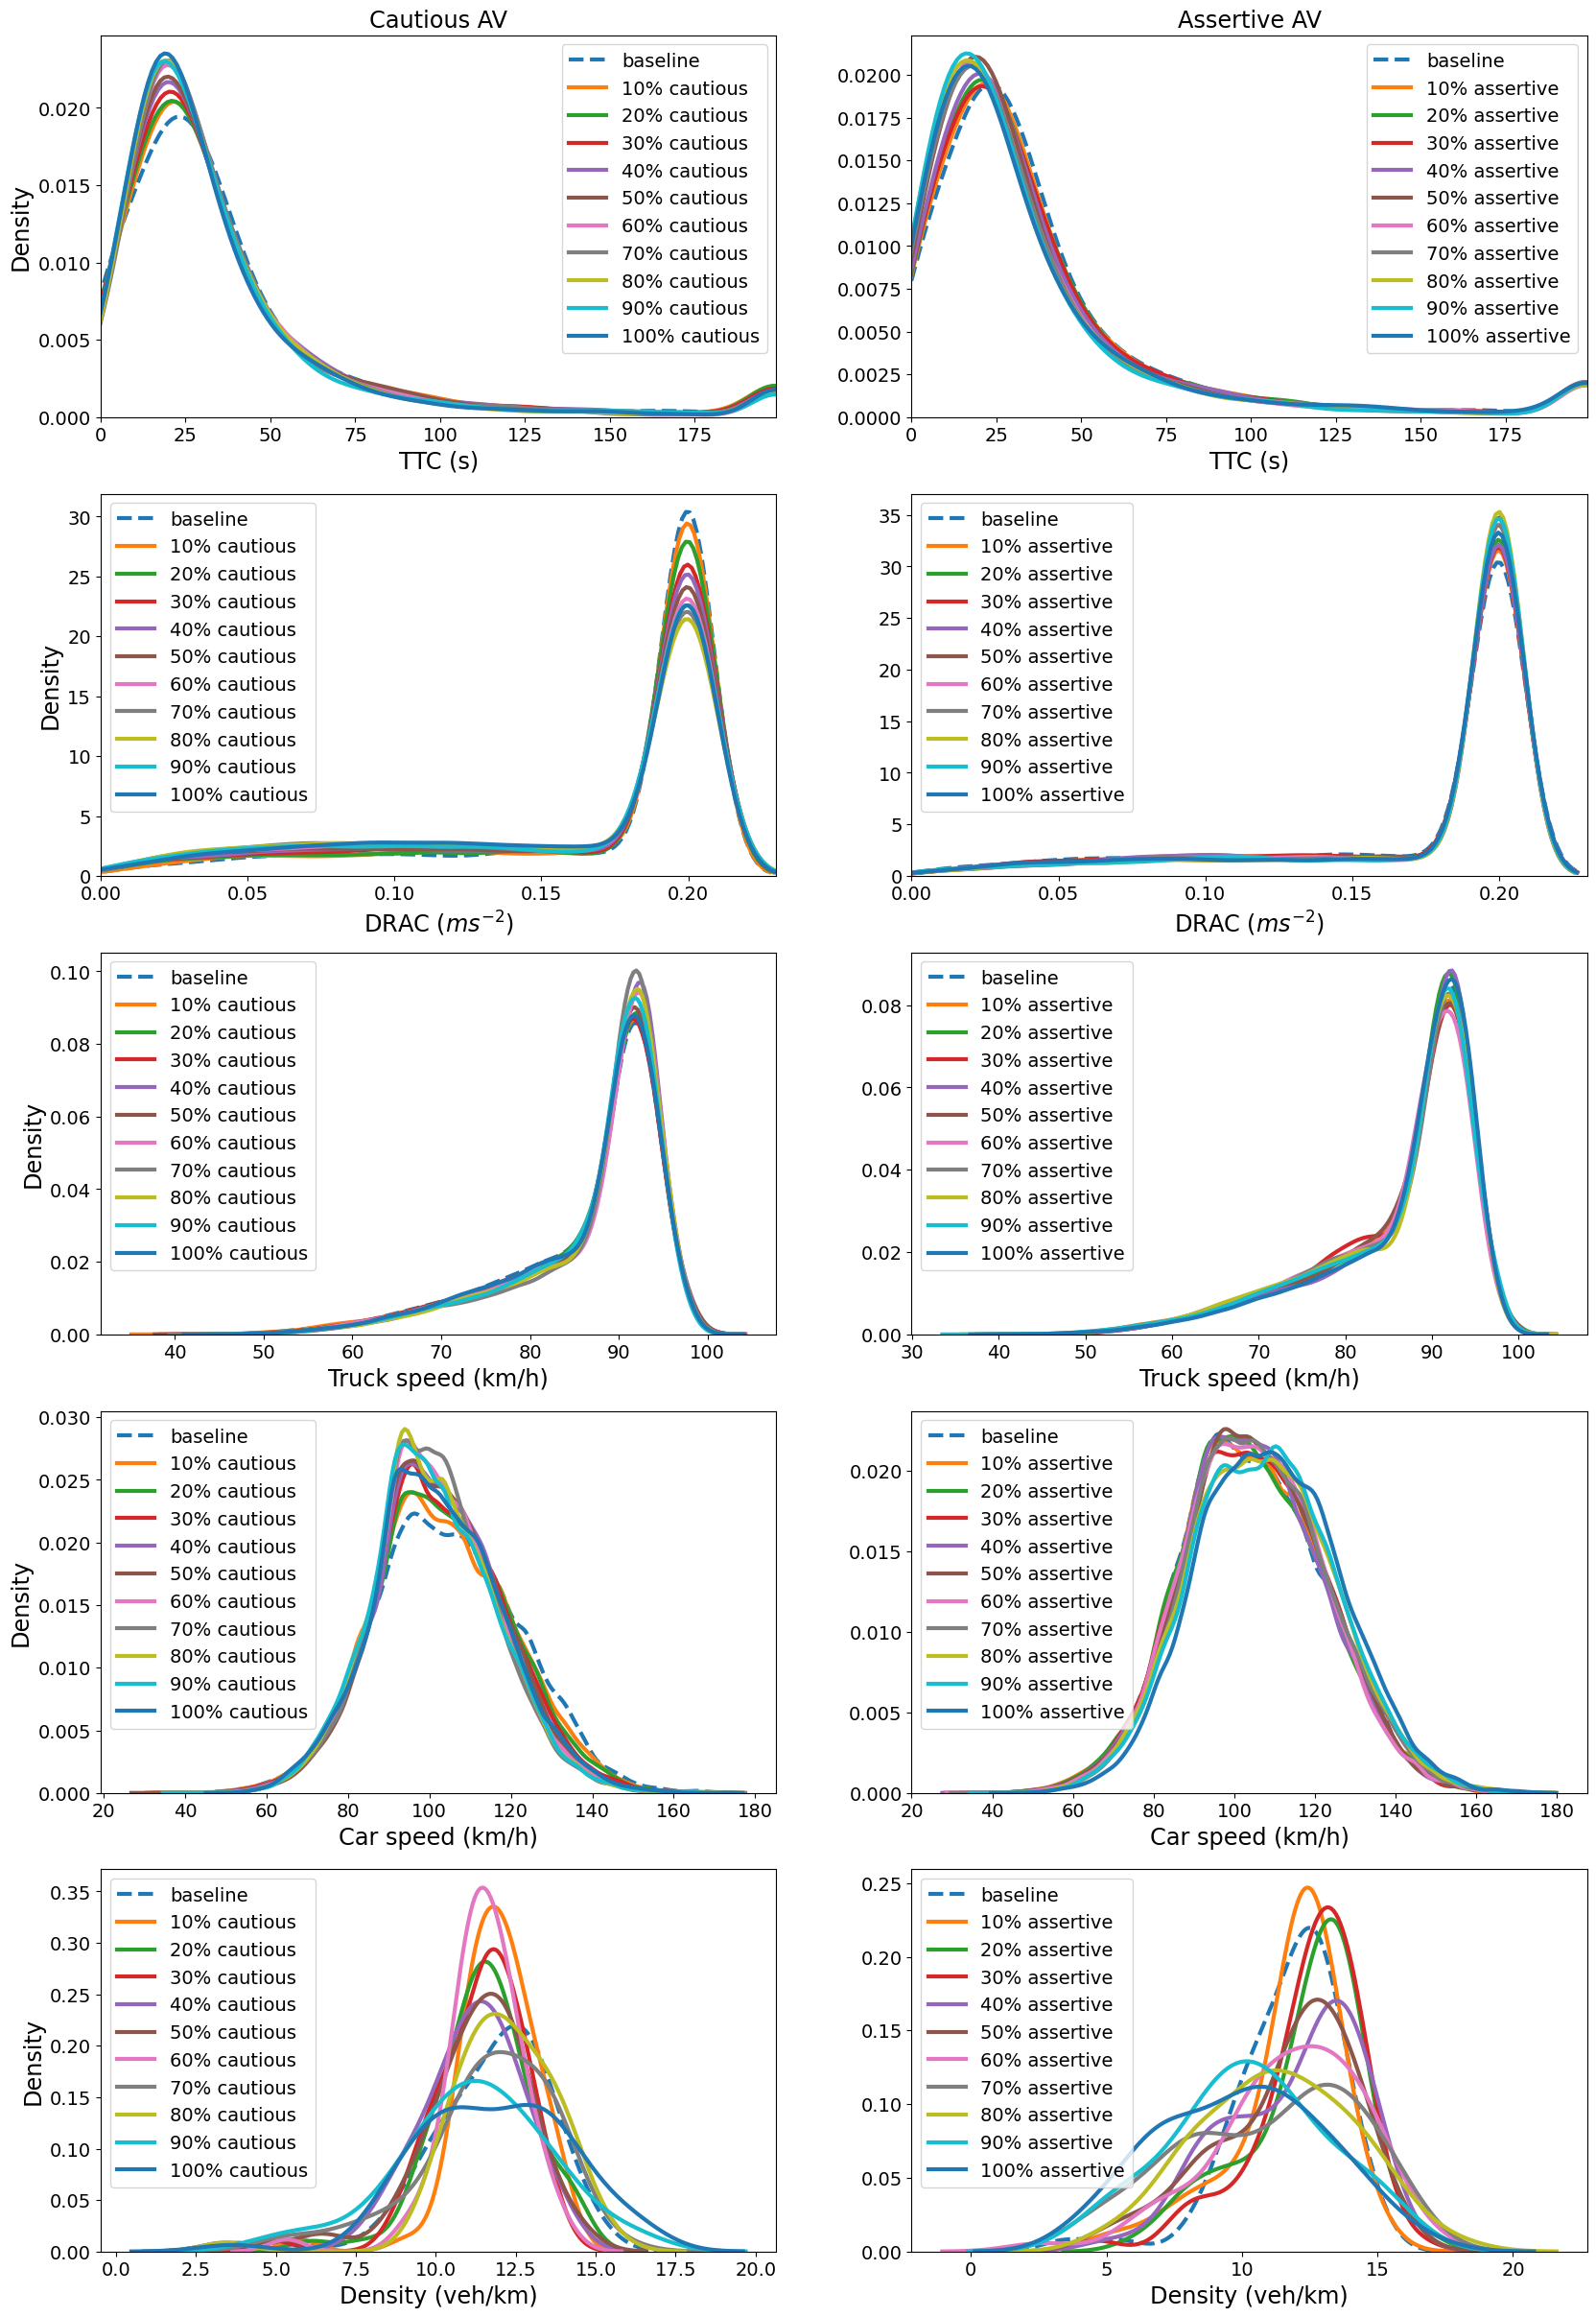

In [168]:
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
xlabels = ["TTC (s)", "DRAC ($ms^{-2}$)", "Truck speed (km/h)", "Car speed (km/h)", "Density (veh/km)"]
penRates_caut = ["baseline","10% cautious", "20% cautious","30% cautious","40% cautious", "50% cautious", "60% cautious", "70% cautious", "80% cautious",  "90% cautious", "100% cautious"]
penRates_asser = ["baseline","10% assertive", "20% assertive","30% assertive","40% assertive", "50% assertive", "60% assertive", "70% assertive", "80% assertive",  "90% assertive", "100% assertive"]

Assertive_data_dict[assertive_file_names[0]]['TTC'] = np.array(Assertive_data_dict[assertive_file_names[0]]['TTC']).clip(0, 199)
Assertive_data_dict[assertive_file_names[0]]['DRAC'] = np.array(Assertive_data_dict[assertive_file_names[0]]['DRAC']).clip(0, 0.2)
Cautious_data_dict[cautious_file_names[0]]['TTC'] = np.array(Cautious_data_dict[cautious_file_names[0]]['TTC']).clip(0, 199)
Cautious_data_dict[cautious_file_names[0]]['DRAC'] = np.array(Cautious_data_dict[cautious_file_names[0]]['DRAC']).clip(0, 0.2)

for i in range(len(assertive_file_names)-1):
    # # Clip TTC and DRAC data to 0-199s and 0-0.17ms-2, respectively
    Assertive_data_dict[assertive_file_names[i+1]]['TTC'] = np.array(Assertive_data_dict[assertive_file_names[i+1]]['TTC']).clip(0, 199)
    Assertive_data_dict[assertive_file_names[i+1]]['DRAC'] = np.array(Assertive_data_dict[assertive_file_names[i+1]]['DRAC']).clip(0, 0.2)
    Cautious_data_dict[cautious_file_names[i+1]]['TTC'] = np.array(Cautious_data_dict[cautious_file_names[i+1]]['TTC']).clip(0, 199)
    Cautious_data_dict[cautious_file_names[i+1]]['DRAC'] = np.array(Cautious_data_dict[cautious_file_names[i+1]]['DRAC']).clip(0, 0.2)

    # print(Assertive_data_dict[assertive_file_names[i]][POI])
    bins, lb, ub = BinSize(np.array(Assertive_data_dict[assertive_file_names[i+1]]["TTC"]), 'TTC')

    for j, POI in enumerate(POIs):
        if i == 0:
            sns.kdeplot(Cautious_data_dict[cautious_file_names[0]][POI], legend=True, linestyle=('dashed'), label="Baseline", ax=axs[j, 0], linewidth=3).set_zorder(100)
            sns.kdeplot(Cautious_data_dict[cautious_file_names[0]][POI], legend=True, linestyle=('dashed'), label="Baseline", ax=axs[j, 1], linewidth=3).set_zorder(100)
        sns.kdeplot(Cautious_data_dict[cautious_file_names[i+1]][POI], legend=True, label="Cautious", ax=axs[j, 0], linewidth=3)
        sns.kdeplot(Assertive_data_dict[assertive_file_names[i+1]][POI], legend=True, label="Assertive", ax=axs[j, 1], linewidth=3)
        axs[j, 0].set_xlabel(xlabels[j], size='xx-large')
        axs[j, 1].set_xlabel(xlabels[j], size='xx-large')
        axs[j, 0].set_ylabel("Density", size='xx-large')
        axs[j, 1].set_ylabel(" ")
        axs[j, 0].legend(penRates_caut, fontsize=14)
        axs[j, 1].legend(penRates_asser, fontsize=14)
        axs[j, 0].tick_params(labelsize=14)
        axs[j, 1].tick_params(labelsize=14)

        if POI == 'TTC':
            axs[j, 0].set_xlim(0,199)
            axs[j, 1].set_xlim(0,199)
        if POI == 'DRAC':
            axs[j, 0].set_xlim(0,0.23)
            axs[j, 1].set_xlim(0,0.23)


axs[0, 0].set_title("Cautious AV", size='xx-large')
axs[0, 1].set_title("Assertive AV", size='xx-large')

plt.show()